## Fasttext

following tutorial https://fasttext.cc/docs/en/supervised-tutorial.html

## TODO
- prepare an input file with categories and their keywords
- prepare input file with categories and single keywords
- split datasets in training and validation
- run simple model settings (default as above)
- balance datasets for training 
 - feed GOOOGLE search words!

 
- try to use it as a word vectorizer and measure distance?

In [3]:
## load the data
import sys
# Add src folder to the path
sys.path.append('../src/')
from data.preprocess_keywords import make_cleaned_keywords_df
from data.make_datasets import get_data
# Specify wanted time range
start_date = '2017-01-01' #'2020-01-01' #'2017-01-01'
end_date = '2022-01-01'
# Path to data
data_file = '/home/anya_m/data/dw-project-data/CMS_2010_to_June_2022_ENGLISH.json'
# Load and extract data within time range
df_subset = get_data(data_file, start_date, end_date)
# Cleans keywords and saves data as a dataframe
#make_cleaned_keywords_df(df_subset, start_date, end_date)

Getting data...
Loading data DONE. Number of articles is 175659
Extracting data DONE. Number of articles from 2017-01-01 to 2022-01-01 is 69432


In [4]:
# Load DW data
import pandas as pd
# start_date = '2017-01-01' #'2019-01-01' #'2021-01-01'
# end_date = '2022-01-01'
filepath = '../data/interim/clean_keywords_' + start_date + '_' + end_date + '.json'
df = pd.read_json(filepath, orient ='split', compression = 'infer')

In [5]:
df.head()

,id,lastModifiedDate,Date,keywordStrings,cleanFocusParentCategory,cleanFocusCategory,teaser,keywordStringsCleanAfterFuzz
132314,36957838,2017-01-01T00:56:37.218Z,2017-01-01,"[Margaret Thatcher, Helmut Kohl, German reunif...",History,History,Thatcher was warned of Germany's aggressive ch...,"[margaret thatcher, helmut kohl, german unific..."
132315,36961015,2017-01-01T01:29:04.030Z,2017-01-01,"[Syria, Russia, rebels, ceasefire]",Politics,Conflicts,Opposition groups have accused the government ...,"[syria, russia, rebels, ceasefire]"
132316,36963373,2017-01-01T01:32:34.240Z,2017-01-01,"[Syria, Yemen, war, Bashar al-Assad, Saudi Ara...",Politics,Conflicts,Another year has passed and again Syrians and ...,"[syria, yemen, war, bashar al-assad, saudi ara..."
132317,36963742,2017-01-01T01:33:38.106Z,2017-01-01,"[Syria, Russia, Donald Trump, Iran, Turkey, Jo...",Politics,Conflicts,The arms are silent in Syria and civilian suff...,"[syria, russia, donald trump, iran, turkey, jo..."
132318,36959234,2017-01-01T01:35:56.153Z,2017-01-01,[Angela Merkel],Politics,Politics,"In her New Year's speech, German Chancellor An...",[angela merkel]


In [6]:
#add column teaser to the df cleaned dataframe
#df=df.merge(df_subset['teaser'], left_on=df_subset['id'], right_on=df['id'])
#df=df.drop(['key_0'], axis=1)
df=df.drop(['keywordStrings'], axis=1)
#add column with full text of the article into the dataframe
# df=df.merge(df_subset['text'], left_on=df['id'], right_on=df_subset['id'] )

In [7]:
#remove all NaN fields
df_clean=df.dropna(how='any')
df_clean_copy = df_clean.copy(deep=True)
##
#df_clean['cleanFocusCategory']=='Law and Justice' replace with Law-and-Justice  and other categories

df_clean['cleanFocusParentCategory'] = df_clean['cleanFocusParentCategory'].replace(['Law and Justice'], 'Law-and-Justice')
df_clean['cleanFocusParentCategory'] = df_clean['cleanFocusParentCategory'].replace(['Nature and Environment'], 'Nature-and-Environment')
df_clean['cleanFocusParentCategory'] = df_clean['cleanFocusParentCategory'].replace(['Human Rights'], 'Human-Rights')
df_clean['cleanFocusParentCategory'] = df_clean['cleanFocusParentCategory'].replace(['Cars and Transportation'], 'Cars-and-Transportation')
#df_clean['cleanFocusCategory'] = df_clean['cleanFocusCategory'].replace(['Press Freedom'], 'Press-Freedom')
df_clean['cleanFocusParentCategory'] = df_clean['cleanFocusParentCategory'].replace(['Digital World'], 'Digital-World')
#df_clean['cleanFocusCategory'] = df_clean['cleanFocusCategory'].replace(['Rule of Law'], 'Rule-of-Law')
df_clean['cleanFocusParentCategory'] = df_clean['cleanFocusParentCategory'].replace(['Learning German'], 'Learning-German')
#df_clean['cleanFocusCategory'] = df_clean['cleanFocusCategory'].replace(['Freedom of Speech'], 'Freedom-of-Speech')

/home/anya_m/Documents/git_dw/venv/lib64/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/anya_m/Documents/git_dw/venv/lib64/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/anya_m/Documents/git_dw/venv/lib64/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [8]:
df_clean_single_kw=df_clean.explode('keywordStringsCleanAfterFuzz')

label=df_clean['cleanFocusParentCategory'].apply(lambda x: ('__label__' +x+' '))
kw=df_clean['keywordStringsCleanAfterFuzz'].apply(lambda x: (', '.join(x)))
teaser=df_clean['teaser']

In [9]:
df_clean_single_kw=df_clean_single_kw.dropna(how='any')

In [10]:
single_kw_label=df_clean_single_kw['cleanFocusParentCategory'].apply(lambda x: ('__label__' +x+' '))
single_kw=df_clean_single_kw['keywordStringsCleanAfterFuzz']
print(single_kw_label+single_kw)

132314     __label__History margaret thatcher
132314           __label__History helmut kohl
132314    __label__History german unification
132314           __label__History berlin wall
132314               __label__History britain
                         ...                 
172678                 __label__Health france
172678          __label__Health birth control
172678          __label__Health contraception
172678         __label__Health contraceptives
172678    __label__Health reproductive health
Length: 358724, dtype: object


In [11]:
label_kw=label+kw
label_single_kw=single_kw_label+single_kw
label_teaser=label+teaser

In [12]:
# split dataset into train and test subsets
import numpy as np
from sklearn.model_selection import train_test_split as tts
## TODO fix stratify?
def split_dataset(dataset, label):
    train_set, test_set=tts(dataset, random_state=0, test_size=0.33)#, stratify=label)
    return train_set, test_set

In [13]:
import os
def save_txt(out_name,data_to_save):
    from tqdm import tqdm
    #!rm $out_name
    if os.path.isfile(out_name):
        os.remove(out_name)
    with open(out_name,'a') as f:
        for i,el in tqdm(enumerate(data_to_save)):
            print(el,file=f)
    input_file=out_name
    return input_file

In [14]:
label_kw_train,label_kw_test=split_dataset(label_kw,label)
label_single_kw_train,label_single_kw_test=split_dataset(label_single_kw,single_kw_label)
label_teaser_train,label_teaser_test=split_dataset(label_teaser,label)

In [15]:
all_kw_train=save_txt('./fasttext/all_kw_train.txt',label_kw_train)
all_kw_test=save_txt('./fasttext/all_kw_test.txt',label_kw_test)
#all_kw_train
#!head ./fasttext/all_kw_train.txt

45882it [00:00, 417033.56it/s]
22599it [00:00, 190913.99it/s]


In [16]:
single_kw_train=save_txt('./fasttext/single_kw_train.txt',label_single_kw_train)
single_kw_test=save_txt('./fasttext/single_kw_test.txt',label_single_kw_test)

!cat ./fasttext/single_kw_train.txt | sed -e "s/\([.\!?,'/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > ./fasttext/single_kw_train.preprocessed.txt
!cat ./fasttext/single_kw_test.txt | sed -e "s/\([.\!?,'/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > ./fasttext/single_kw_test.preprocessed.txt

single_kw_train_prec='./fasttext/single_kw_train.preprocessed.txt'
single_kw_test_prec='./fasttext/single_kw_test.preprocessed.txt'


240345it [00:00, 386112.39it/s]
118379it [00:00, 493597.88it/s]


In [17]:
teaser_train=save_txt('./fasttext/teaser_train.txt',label_teaser_train)
teaser_test=save_txt('./fasttext/teaser_test.txt',label_teaser_test)

!cat ./fasttext/teaser_train.txt | sed -e "s/\([.\!?,'/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > ./fasttext/teaser_train.preprocessed.txt
!cat ./fasttext/teaser_test.txt | sed -e "s/\([.\!?,'/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > ./fasttext/teaser_test.preprocessed.txt

teaser_train_prec='./fasttext/teaser_train.preprocessed.txt'
teaser_test_prec='./fasttext/teaser_test.preprocessed.txt'


45882it [00:00, 343400.58it/s]
22599it [00:00, 427201.66it/s]


### Trying Fasttext
- DW all kw + DW cats  - training + validation
- DW all kw for training, DW single kw for validation
- DW single kw for training + validation
- DW teaser + DW cats          - training + validation

implement train_test_split for splitting dataset

- DW teaser / kw for training , google for ???
- - validation based on similarity of google to DW kw (rapidfuzz? cdist / word embeddings using fasstext)

- - make graphics to compare categories from DW and Google

- DW text for training, DW kw for validation
- - clean html (beautiful soup?)

In [18]:
import fasttext

In [19]:
#OLD way . now replaced with tran test split

# # single kw 
# #preprocessing and 
# #splittig into training and validation sets
# !cat ./fasttext/single_kw.txt | sed -e "s/\([.\!?,'/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > ./fasttext/single_kw.preprocessed.txt

# !head -n 300000 ./fasttext/single_kw.preprocessed.txt > ./fasttext/single_kw_cl.train
# !tail -n 60000 ./fasttext/single_kw.preprocessed.txt > ./fasttext/single_kw_cl.valid

In [20]:
def fasttext_classifier(train_file,test_file,lr=1.0,epoch=12,k=1,wordNgrams=1):
    model = fasttext.train_supervised(input=train_file, lr=lr, epoch=epoch)
    #model.test(test_file,k=k)
    print(model.test(test_file,k=1))
    print(model.test(test_file,k=2))
    print(model.test(test_file,k=3))
    print(model.test(test_file,k=4))
    print(model.test(test_file,k=5))
    return model

In [21]:
model_all_kw_check=fasttext_classifier(all_kw_train,all_kw_test,lr=1,wordNgrams=2)
#model_all_kw_check.test(all_kw_test)

Read 0M words
Number of words:  36980
Number of labels: 24
Progress: 100.0% words/sec/thread:  398171 lr:  0.000000 avg.loss:  0.803290 ETA:   0h 0m 0s


(22599, 0.6904287800345148, 0.6904287800345148)
(22599, 0.40917739722996593, 0.8183547944599319)
(22599, 0.2935085623257666, 0.8805256869772998)
(22599, 0.2283286871100491, 0.9133147484401964)
(22599, 0.18639762821363778, 0.9319881410681888)


In [22]:
model_single_kw_check=fasttext_classifier(single_kw_train,single_kw_test,lr=0.7,wordNgrams=2)
#model_single_kw_check.test(single_kw_test)

Read 0M words
Number of words:  28634
Number of labels: 24
Progress: 100.0% words/sec/thread:  248003 lr:  0.000000 avg.loss: 10.223475 ETA:   0h 0m 0s


(118379, 0.5088824876033756, 0.5088824876033756)
(118379, 0.2544792573007037, 0.5089585146014074)
(118379, 0.17014842159504642, 0.5104452647851393)
(118379, 0.13081923314101318, 0.5232769325640527)
(118379, 0.1222733761900337, 0.6113668809501686)


In [23]:
fasttext_classifier(single_kw_train,single_kw_test,lr=0.7,wordNgrams=5)
#model_single_kw_check.test(single_kw_test)

Read 0M words
Number of words:  28634
Number of labels: 24
Progress: 100.0% words/sec/thread:  244384 lr:  0.000000 avg.loss:  9.942472 ETA:   0h 0m 0s


(118379, 0.4991256895226349, 0.4991256895226349)
(118379, 0.24960085826033335, 0.4992017165206667)
(118379, 0.1668539183470041, 0.5005617550410123)
(118379, 0.12841171153667458, 0.5136468461466983)
(118379, 0.11894001469855295, 0.5947000734927648)


In [24]:
fasttext_classifier(single_kw_train_prec,single_kw_test_prec,lr=0.7)
#model_single_kw_check_prec.test(single_kw_test_prec)

Read 0M words
Number of words:  28575
Number of labels: 24
Progress:  99.7% words/sec/thread:  243681 lr:  0.002104 avg.loss: 10.248903 ETA:   0h 0m 0s

(118379, 0.5063060171145221, 0.5063060171145221)


Progress: 100.0% words/sec/thread:  242647 lr:  0.000000 avg.loss: 10.242036 ETA:   0h 0m 0s


(118379, 0.25319102205627686, 0.5063820441125537)
(118379, 0.16928115065453614, 0.5078434519636084)
(118379, 0.13003573268907492, 0.5201429307562997)
(118379, 0.1222835131231046, 0.6114175656155231)


In [25]:
model_teaser=fasttext_classifier(teaser_train,teaser_test)

Read 1M words
Number of words:  89202
Number of labels: 24
Progress:  98.7% words/sec/thread: 1040846 lr:  0.012653 avg.loss:  0.706063 ETA:   0h 0m 0s

(22599, 0.6717996371520863, 0.6717996371520863)
(22599, 0.4047302978007876, 0.8094605956015752)
(22599, 0.289511335309822, 0.868534005929466)
(22599, 0.2252422673569627, 0.9009690694278508)
(22599, 0.1840877914951989, 0.9204389574759945)


Progress: 100.0% words/sec/thread: 1036640 lr:  0.000000 avg.loss:  0.697152 ETA:   0h 0m 0s


In [26]:
model_teaser=fasttext_classifier(teaser_train_prec,teaser_test_prec)

Read 1M words
Number of words:  55003
Number of labels: 24
Progress:  98.4% words/sec/thread: 1109777 lr:  0.016119 avg.loss:  0.734298 ETA:   0h 0m 0s

(22599, 0.6814460816850303, 0.6814460816850303)
(22599, 0.41108013628921636, 0.8221602725784327)
(22599, 0.2947770550319336, 0.8843311650958007)
(22599, 0.22949024293110315, 0.9179609717244126)
(22599, 0.18761007124209036, 0.9380503562104517)


Progress: 100.0% words/sec/thread: 1110059 lr:  0.000000 avg.loss:  0.722952 ETA:   0h 0m 0s


In [27]:
model_teaser=fasttext_classifier(teaser_train_prec,teaser_test_prec,wordNgrams=3)

Read 1M words
Number of words:  55003
Number of labels: 24
Progress: 100.0% words/sec/thread: 1110084 lr:  0.000000 avg.loss:  0.844512 ETA:   0h 0m 0s


(22599, 0.6839240674366123, 0.6839240674366123)
(22599, 0.4106818885791407, 0.8213637771582813)
(22599, 0.2944083071522339, 0.8832249214567016)
(22599, 0.22902562060268153, 0.9161024824107261)
(22599, 0.18740652241249614, 0.9370326120624807)


In [28]:
model_teaser_single=fasttext_classifier(teaser_train_prec,single_kw_test_prec)

Read 1M words
Number of words:  55003
Number of labels: 24
Progress: 100.0% words/sec/thread: 1109880 lr:  0.000000 avg.loss:  0.779877 ETA:   0h 0m 0s100.0% words/sec/thread: 1109888 lr: -0.000006 avg.loss:  0.779877 ETA:   0h 0m 0s


(118379, 0.3961935816318773, 0.3961935816318773)
(118379, 0.2623522753191022, 0.5247045506382044)
(118379, 0.20050853614239011, 0.6015256084271704)
(118379, 0.16408315664095827, 0.6563326265638331)
(118379, 0.1410098074827461, 0.7050490374137305)


In [29]:
# #automatic search for best hyperparameters https://fasttext.cc/docs/en/autotune.html 
# #last 5 minutes
# model_best = fasttext.train_supervised(input=train_file, autotuneValidationFile='./fasttext/output_cl.valid')
# model_best.test('./fasttext/output_cl.valid')

In [30]:
#The output are the number of samples (here 14999), 
# the precision at one (0.6968)  69% and 
# the recall at one (0.0541).

#The precision is the number of correct labels among the labels predicted by fastText. 
# The recall is the number of labels that successfully were predicted,
# among all the real labels. 

With a few steps, we were able to go from a precision at one of 12.4% to 59.9%. Important steps included:

- preprocessing the data ;
- changing the number of epochs (using the option -epoch, standard range [5 - 50]) ;
- changing the learning rate (using the option -lr, standard range [0.1 - 1.0]) ;
- using word n-grams (using the option -wordNgrams, standard range [1 - 5]).

In [31]:
# function to run predictions for a single kw and 
# make list of labels 
def prediction(model, keyword,k=1):
    x=model.predict(keyword,k=k)
    list_label=[]
    for k in range(1,k+1):
        pred_label=(x[0][k-1].split('__')[2])
        list_label.append(pred_label)
        tuple_label=tuple(list_label)
    return tuple_label


#list_labels=prediction(model_all_kw_check,selected_keyword,k=1)

In [32]:
#prediction for list of input keywords
def run_predict_for_series(model,series_kw):
    list_of_series = []
    for selected_keyword in series_kw:
        list_of_k = [k for k in range(1,3)]
        predictions = [prediction(model,selected_keyword,k=i) for i in list_of_k]
        predictions = pd.Series(predictions, index=list_of_k, name=selected_keyword)
        list_of_series.append(predictions)

    result = pd.concat(list_of_series, axis=1).T
    return result


In [34]:
#count amount of predictions for each category
def count_values_for_columns(result):
    val_counts_for_cols = {}
    for col in result.columns:
        val_counts = result.explode(col)[col].value_counts()
        val_counts_for_cols[col] = val_counts
    return val_counts_for_cols

In [35]:
#plot pie chart
import matplotlib.pyplot as plt
import seaborn as sns

#define data

def plot_pie(data, labels,title):
    #define Seaborn color palette to use
    colors = sns.color_palette('pastel')[0:25]

    #create pie chart
    plt.title(title)
    plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
    plt.show()

In [33]:
# make df with dw categories and extracted labels
new_labels = single_kw_label.str.split('__').apply(lambda row: row[2])

d={'dw_cat':new_labels,'dw_kw':single_kw}#,'pred_cat1','pred_cat2','pred_cat3','pred_cat4','pred_cat5'}
df_single=pd.DataFrame(data=d)

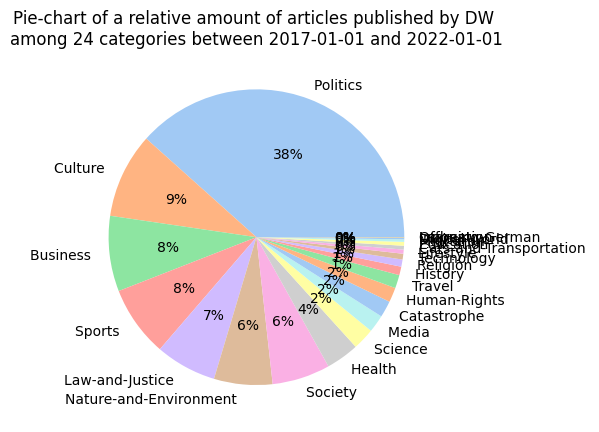

In [48]:
#count_values_for_columns(df_single)['dw_cat']

data = count_values_for_columns(df_single)['dw_cat'].values
labels = count_values_for_columns(df_single)['dw_cat'].index
title=('Pie-chart of a relative amount of articles published by DW \n'+
       'among ' +str(len(labels)) + ' categories between ' +start_date+' and ' +end_date)

plot_pie(data,labels,title)

In [37]:
#google keywords to dw categories
# Load Google data
google_usa_json='../data/interim/2021-daily-trending-searches.json'
google_world_json='../data/interim/2021_daily_trending_searches_World.json'
df_google = pd.read_json(google_world_json, orient ='split', compression = 'infer')

# Keeps only google data within DW data date range
start_date_dw=start_date
end_date_dw=end_date
df_google.sort_values(by ='date', inplace = True) 
mask = (pd.to_datetime(df_google['date']) > start_date_dw) & (pd.to_datetime(df_google['date']) <= end_date_dw)
df_google_subset = df_google.loc[mask].copy()
google_topic=df_google_subset['topic_title']
google_topic_type=df_google_subset['topic_title']

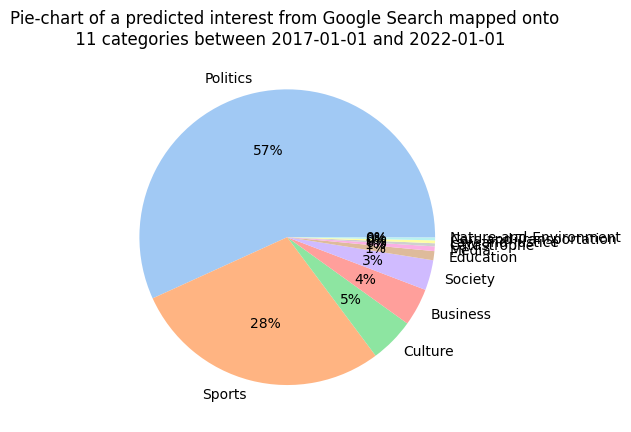

In [47]:
#predict categories for google searches topic title+type
google_data=df_google_subset['topic_title']+' '+df_google_subset['topic_type']

#google_result=run_predict_for_series(model_all_kw_check,df_google_subset['topic_type']) #only topic type
#google_result=run_predict_for_series(model_all_kw_check,df_google_subset['topic_title']) #only topic title
google_result=run_predict_for_series(model_all_kw_check,google_data) #topic title+type

#count amount GS words for each category
#count_values_for_columns(google_result)[1]
data_g = count_values_for_columns(google_result)[1].values
labels_g = count_values_for_columns(google_result)[1].index

#make pie plot for google searches
title_g=('Pie-chart of a predicted interest from Google Search mapped onto \n'+
       ' ' +str(len(labels_g)) + ' categories between ' +start_date+' and ' +end_date)

plot_pie(data_g,labels_g,title_g)

In [ ]:
# #alternative plot for google predictions when predicting 2 categories with fasttext
# title_g2=('Pie-chart of a predicted interest from Google Search mapped onto \n'+
#        ' ' +str(len(labels)) + ' categories between ' +start_date+' and ' +end_date+
#        '\n when predicting 2 categories')
# data_g2 = count_values_for_columns(google_result)[2].values
# labels_g2 = count_values_for_columns(google_result)[2].index

# plot_pie(data_g2,labels_g2,title_g2)

In [ ]:
#prediction of categories from google search words loook reasonable
google_result[80:110]

In [ ]:
#DW
#predict dw category for each kw
result=run_predict_for_series(model_all_kw_check,single_kw)

result=result.merge(df_single, left_index=True, right_on='dw_kw')
#count_values_for_columns(result)[]

In [ ]:
#plot predicted DW categories
data = count_values_for_columns(result)['dw_cat'].values
labels = count_values_for_columns(result)['dw_cat'].index
title=('Pie-chart of a relative amount of articles published by DW \n'+
       'among ' +str(len(labels)) + ' categories between ' +start_date+' and ' +end_date)


plot_pie(data,labels,title)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#define data
data_pred = val_counts_for_cols[1].values
labels_pred = val_counts_for_cols[1].index
title_pred='Pie-chart of a relative amount of predicted categories from DW keywords\nfor ' +str(len(labels)) + ' categories between ' +start_date+' and ' +end_date

plot_pie(data_pred,labels_pred,title_pred)

In [ ]:
data_pred2 = val_counts_for_cols[1].values
labels_pred2 = val_counts_for_cols[1].index
title_pred2='Pie-chart of a relative amount of predicted categories from DW keywords\nfor ' +str(len(labels)) + ' categories between ' +start_date+' and ' +end_date +'\n when predicting 2 categories'

plot_pie(data_pred2,labels_pred2,title_pred2)